# Handling Date and Time Data

## String to Date conversion

In [1]:
import numpy as np
import pandas as pd

In [3]:
date_strings = np.array(['03-04-2021 11:35 AM','23-05-2020 12:01 AM','04-09-2019 09:09 PM'])

In [5]:
converted_strings = [pd.to_datetime(date, format='%d-%m-%Y %I:%M %p') for date in date_strings]

In [6]:
converted_strings

[Timestamp('2021-04-03 11:35:00'),
 Timestamp('2020-05-23 00:01:00'),
 Timestamp('2019-09-04 21:09:00')]

In [7]:
converted_strings[0].year

2021

In [9]:
converted_strings[1].month

5

In [10]:
converted_strings[2].hour

21

## Breaking Up Data into Multiple Features

In [11]:
dataframe = pd.DataFrame()

In [12]:
dataframe['date'] = pd.date_range('1/1/2001',periods=150,freq='w')

In [13]:
dataframe.head(10)

,date
0,2001-01-07
1,2001-01-14
2,2001-01-21
3,2001-01-28
4,2001-02-04
5,2001-02-11
6,2001-02-18
7,2001-02-25
8,2001-03-04
9,2001-03-11


In [15]:
dataframe['year'] = dataframe['date'].dt.year
dataframe['month'] = dataframe['date'].dt.month
dataframe['day'] = dataframe['date'].dt.day
dataframe['hour'] = dataframe['date'].dt.hour
dataframe['minute'] = dataframe['date'].dt.minute

In [16]:
dataframe.head(10)

,date,year,month,day,hour,minute
0,2001-01-07,2001,1,7,0,0
1,2001-01-14,2001,1,14,0,0
2,2001-01-21,2001,1,21,0,0
3,2001-01-28,2001,1,28,0,0
4,2001-02-04,2001,2,4,0,0
5,2001-02-11,2001,2,11,0,0
6,2001-02-18,2001,2,18,0,0
7,2001-02-25,2001,2,25,0,0
8,2001-03-04,2001,3,4,0,0
9,2001-03-11,2001,3,11,0,0


## Date Arithmetic


In [18]:
dataframe = pd.DataFrame()

In [19]:
dataframe['Starting'] = [pd.Timestamp('01-09-2021'),pd.Timestamp('01-04-2021')]
dataframe['Ending'] = [pd.Timestamp('01-18-2021'),pd.Timestamp('01-08-2021')]

In [20]:
dataframe['Ending'] - dataframe['Starting']

0   9 days
1   4 days
dtype: timedelta64[ns]

## Encoding Days of Week

In [33]:
dates = pd.Series(pd.date_range('8/7/2021',periods=5,freq='M'))

In [34]:
dates.dt.weekday_name

AttributeError: 'DatetimeProperties' object has no attribute 'weekday_name'

In [32]:
dates.dt.day_name()

0     Tuesday
1    Thursday
2      Sunday
3     Tuesday
4      Friday
dtype: object

In [29]:
dates.dt.weekday

0    1
1    3
2    6
3    1
4    4
dtype: int64

## Handling Missing Data in Time Series

In [35]:
time_index = pd.date_range("04/01/2020",periods=5,freq='M')

In [36]:
dataframe = pd.DataFrame(index=time_index)

In [37]:
dataframe["Sales"] = [124.0,219.0,np.nan,np.nan,545.0]

In [38]:
dataframe

,Sales
2020-04-30,124.0
2020-05-31,219.0
2020-06-30,NaN
2020-07-31,NaN
2020-08-31,545.0


In [39]:
dataframe.index

DatetimeIndex(['2020-04-30', '2020-05-31', '2020-06-30', '2020-07-31',
               '2020-08-31'],
              dtype='datetime64[ns]', freq='M')

In [40]:
dataframe.values

array([[124.],
       [219.],
       [ nan],
       [ nan],
       [545.]])

In [41]:
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


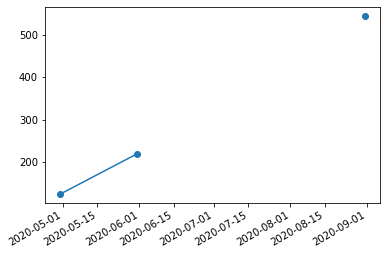

In [42]:
fig,ax= plt.subplots()
ax.plot_date(dataframe.index,dataframe.values,linestyle='-')
fig.autofmt_xdate()

In [43]:
fixed_frame = dataframe.interpolate()

In [44]:
fixed_frame

,Sales
2020-04-30,124.000000
2020-05-31,219.000000
2020-06-30,327.666667
2020-07-31,436.333333
2020-08-31,545.000000


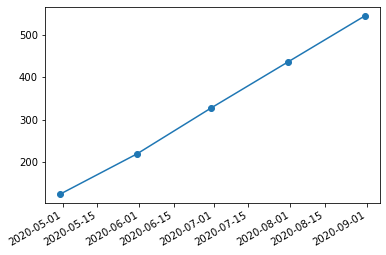

In [45]:
fig,ax= plt.subplots()
ax.plot_date(dataframe.index,fixed_frame.values,linestyle='-')
fig.autofmt_xdate()

In [46]:
quadratic_data = dataframe.interpolate(method="quadratic")

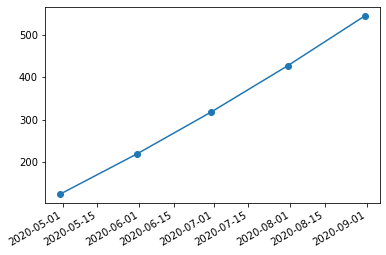

In [47]:
fig,ax= plt.subplots()
ax.plot_date(dataframe.index,quadratic_data.values,linestyle='-')
fig.autofmt_xdate()

In [48]:
forward_fill = dataframe.ffill()

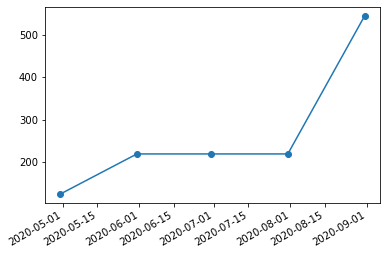

In [49]:
fig,ax= plt.subplots()
ax.plot_date(dataframe.index,forward_fill.values,linestyle='-')
fig.autofmt_xdate()

In [51]:
backward_fill = dataframe.bfill()

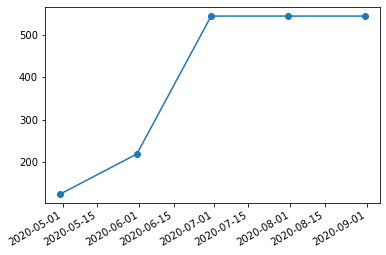

In [52]:
fig,ax= plt.subplots()
ax.plot_date(dataframe.index,backward_fill.values,linestyle='-')
fig.autofmt_xdate()